<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_7/7_5_HF_pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#!pip install transformers

In [11]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [12]:
from transformers import pipeline

In [13]:
clf = pipeline("sentiment-analysis")
clf("I love machine learning!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998431205749512}]

In [14]:
translator = pipeline("translation_en_to_de", model="t5-small")
translator("Hugging Face makes NLP easy.")

Device set to use cuda:0


[{'translation_text': 'Hugging Face macht NLP einfach.'}]

In [15]:
gen = pipeline("text-generation", model="gpt2")
gen("Once upon a time, in a world of machine learning,", max_length=40, num_return_sequences=1)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=40) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Once upon a time, in a world of machine learning, there are no other options.\n\nThe problem is that machine learning is becoming more and more prevalent. And this gives us a problem in which we don't even know how to solve it.\n\nWith the advent of machine learning, it has become very clear that there are many different ways of solving problems in the real world.\n\nThis means that as more and more information is thrown into a real world, the problem becomes even more difficult.\n\nThe great thing about machine learning is that it provides us with a much better understanding of what is going on.\n\nA new technology called Deep Learning for Machine Learning is coming to the market.\n\nIt is a new AI system designed to find new ways to solve problems using data.\n\nThis system is based on Deep Learning for Human Machine Learning.\n\nThe system is expected to be ready by the end of this year.\n\nIt is able to generate a highly complex picture of a user's behavior bas

In [16]:
zero = pipeline("zero-shot-classification",
                model="facebook/bart-large-mnli")

zero("This course teaches convolutional networks and transformers.",
    candidate_labels=["education", "politics", "sports"])

Device set to use cuda:0


{'sequence': 'This course teaches convolutional networks and transformers.',
 'labels': ['education', 'sports', 'politics'],
 'scores': [0.9162622094154358, 0.04981270059943199, 0.03392507880926132]}

In [17]:
from transformers import pipeline

summ = pipeline("summarization", model="facebook/bart-large-cnn")

text = """Hugging Face provides a rich ecosystem of libraries for deep learning,
including Transformers, Datasets, Tokenizers, and more. It enables fast experimentation
with state-of-the-art models."""
summ(text)

Device set to use cuda:0
Your max_length is set to 142, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[{'summary_text': 'Hugging Face provides a rich ecosystem of libraries for deep learning, including Transformers, Datasets, Tokenizers, and more. It enables fast experimentation with state-of-the-art models. Hugging Face is available now on the Apple App Store and Google Play.'}]

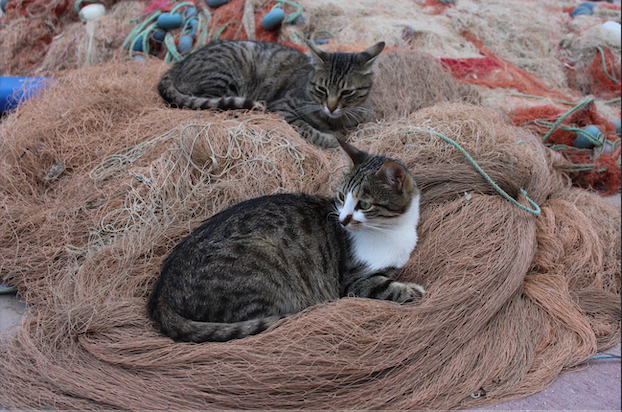

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


[{'label': 'tabby, tabby cat', 'score': 0.27686837315559387},
 {'label': 'tiger cat', 'score': 0.2763683497905731},
 {'label': 'Egyptian cat', 'score': 0.14028170704841614},
 {'label': 'hay', 'score': 0.0253145769238472},
 {'label': 'wool, woolen, woollen', 'score': 0.019932707771658897}]

In [18]:
from PIL import Image
import requests

img = Image.open(requests.get("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cats.png", stream=True).raw)
display(img)

clf = pipeline("image-classification", model="google/vit-base-patch16-224") # ImageNet-1k
clf(img)
